In [1]:
import numpy as np
import fractions
from sympy.matrices import Matrix as SyMatrix
from scipy.optimize import curve_fit
#np.set_printoptions(precision=16)
import matplotlib.pyplot as plt

In [2]:
def mean_solved_time_numpy(n):
    # create the whole matrix
    link = -1/3. # this true for all prisms

    # ones down the diagonal
    matrix = np.diag(np.ones(2*n))

    # near diagonal is almost full.
    near_diagonal = np.repeat(link, 2*n-1)
    near_diagonal[n-1] = 0
    matrix += np.diag(near_diagonal, -1)
    matrix += np.diag(near_diagonal,  1)

    # fill out the near diagonal overflow
    matrix[0, n-1] = link
    matrix[n-1, 0] = link
    matrix[n, 2*n-1] = link
    matrix[2*n-1, n] = link

    # add in the prism diagonals
    prism_diagonal = np.repeat(link, n)
    matrix += np.diag(prism_diagonal,  n)
    matrix += np.diag(prism_diagonal, -n)

    matrix = matrix[1:,1:]
    vals = np.linalg.solve(matrix, np.ones(2*n-1))
    return vals.sum() / (2.*n)

97
97


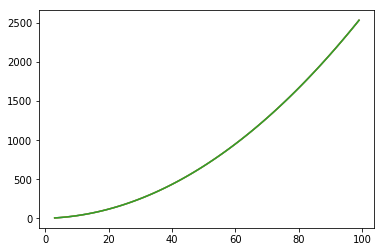

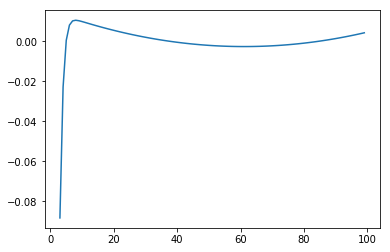

In [15]:
xs = range(3, 100)
ys = [mean_solved_time_numpy(i) for i in xs]

print len(xs)
print len(ys)
plt.plot(xs, ys)

p = np.polyfit(xs, ys, 2)
fit_ys = np.polyval(p, xs)
plt.plot(xs, fit_ys)

plt.show()

plt.plot(xs, fit_ys - ys)
plt.show()

[  5.13551155e-07   2.45363924e+00  -1.48455404e+01  -4.16062807e+01
   1.70751350e+02  -4.90995495e+01   9.81497801e+00  -9.34113381e+01
   1.67776297e+02]


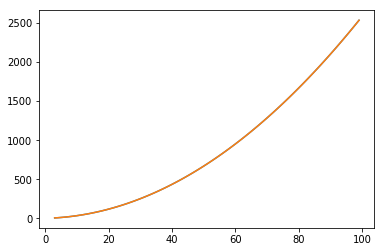

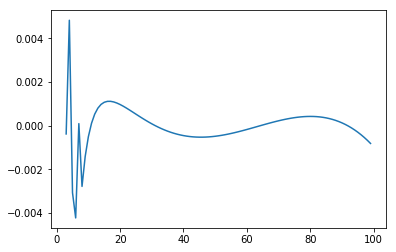

In [34]:
def rational(x, p, q):
    """
    The general rational function description.
    p is a list with the polynomial coefficients in the numerator
    q is a list with the polynomial coefficients (except the first one)
    in the denominator
    The first coefficient of the denominator polynomial is fixed at 1.
    """
    return np.polyval(p, x) / np.polyval([0] + q, x)

def rational3_3(x, p0, p1, p2, p3, p4, p5, q1, q2, q3):
    return rational(x, [p0, p1, p2, p3, p4, p5], [q1, q2, q3])

x = list(xs)
y = list(ys)
popt, pcov = curve_fit(rational3_3, x, y, p0=(0, 1, 1, 1, 1, 1, 1, 1, 1))
print popt

plt.plot(x, y, label='original')
plt.plot(x, rational3_3(x, *popt), label='fit')
plt.show()

plt.plot(x, y - rational(x, popt[:6], popt[6:]))
plt.show()

In [92]:
begin = 3
uptil = 12

def mean_solved_time_sympy(n):
    # create the whole matrix
    link = -1

    # ones down the diagonal
    matrix = np.diag(np.repeat(3, 2*n))

    # near diagonal is almost full.
    near_diagonal = np.repeat(link, 2*n-1)
    near_diagonal[n-1] = 0
    matrix += np.diag(near_diagonal, -1)
    matrix += np.diag(near_diagonal,  1)

    # fill out the near diagonal overflow
    matrix[0, n-1] = link
    matrix[n-1, 0] = link
    matrix[n, 2*n-1] = link
    matrix[2*n-1, n] = link

    # add in the prism diagonals
    prism_diagonal = np.repeat(link, n)
    matrix += np.diag(prism_diagonal,  n)
    matrix += np.diag(prism_diagonal, -n)

    matrix = matrix[1:,1:]
    
    sympy_matrix = SyMatrix(matrix) / 3
    ones = SyMatrix(2*n-1, 1, [1]*(2*n-1))
    
    moves = sympy_matrix.LUsolve(ones)
    #print moves
    return (ones.T * moves)[0, 0] / (2*n)

rationals = [mean_solved_time_sympy(i) for i in range(begin, uptil)]

In [93]:
def lcm(a,b):
    return abs(a * b) / fractions.gcd(a,b) if a and b else 0

def lcm_l(l):
    return reduce(lcm, l, 1)

bigfactor = lcm_l([r.q for r in rationals] + [i**4 for i in range(begin, uptil)])
results = SyMatrix(uptil-begin, 1, [r * bigfactor for r in rationals])
results

Matrix([
[ 196225241640245144845056000],
[ 302687872742931340452480000],
[ 431783426453618935745280000],
[ 582413217208812717146496000],
[ 754147055449848361593600000],
[ 946831523112125129001600000],
[1160415108230610689968896000],
[1394881203362945928094080000],
[1650224605464286530497280000]])

In [94]:
vand = SyMatrix([
    [int(bigfactor * b ** e) 
      for e in range(-3, 5)]
    for b in range(begin, uptil)])
vand

Matrix([
[515432733491581606166528, 1546298200474744885608448, 4638894601424234388389888, 13916683804272703165169664, 41750051412818115924480000, 125250154238454347773440000,  375750462715363043320320000,  1127251388146089129960960000,   3381754164438267389882880000],
[163086138331320748605440,  652344553325282994421760, 2609378213301131977687040, 10437512853204527910748160, 41750051412818115924480000, 167000205651272463697920000,  668000822605089854791680000,  2672003290420359419166720000,  10688013161681437676666880000],
[ 66800082260508979232768,  334000411302544887775232, 1670002056512724573093888,  8350010282563622328598528, 41750051412818115924480000, 208750257064090579622400000, 1043751285320452898112000000,  5218756426602264490560000000,  26093782133011322452800000000],
[ 32214545843223850385408,  193287275059343110701056, 1159723650356058597097472,  6958341902136351582584832, 41750051412818115924480000, 250500308476908695546880000, 1503001850861452173281280000,  90180111051687

In [95]:
vand.LUsolve(results)

Matrix([
[                     36731393893321103721939269514601768945294672382707121590125/887501171848725863740873649696939860225107298845489867328],
[              -34757700421044130598525580978600918303426953658476790417670875/482800637485706869875035265435135283962458370571946487826432],
[              97958571464434285994881348281172892405401970302683683011856625/1931202549942827479500141061740541135849833482287785951305728],
[          -1065609585727725153859824598741611260333325385215843248828429625/61798481598170479344004513975697316347194671433209150441783296],
[234230439574103453710491695033414370665569419781137287115793577041759/77012987153914062717719378905636135251535175383474995912004289122140],
[   1984623398193183996366251583618791168896046492429281805426122970999/4053315113363898037774704152928217644817640809656578732210752059060],
[  7079451156553232835338521086227369156641863385472148853805083055511/25670995717971354239239792968545378417178391794491665304001429707380